# Microsoft Movie Data Analysis
### Author: Keith Maina

## Overview
In this project we are going to be examining film data from various sources on the internet such as IMDB, Rotten Tomatoes among others to determine what the next course of action for the newly founded Microsoft film studio should be. We specifically want to provide insight into the kind of films, they should make.

## Business Problem
We want to know what kind of movie Microsoft movie studios should make by determining the most popular kind of movies.

### Business Questions
What is the movie with the most reviews? <br>
What are the movies with the most positive reviews and what are their genres? <br>
What are the top 5 movie genres by popularity? <br>
What are the movies with the most money made and what are their genres? <br>

In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

## Data Understanding
Here I look at basic information from the  datasets and I decide which datasets to use

In [14]:
# loading the datasets
bom_data= pd.read_csv('Data/bom.movie_gross.csv')

nb_data= pd.read_csv('Data/name.basics.csv')

movie_info= pd.read_csv('Data/rt.movie_info.tsv', sep='\t')

review_data= pd.read_csv('Data/rt.reviews.tsv', sep='\t', encoding= 'latin1')

title_akas= pd.read_csv('Data/title.akas.csv')

title_basics= pd.read_csv('Data/title.basics.csv')

title_crew= pd.read_csv('Data/title.crew.csv')

title_principles= pd.read_csv('Data/title.principals.csv')

title_ratings= pd.read_csv('Data/title.ratings.csv')

tmbd_data= pd.read_csv('Data/tmdb.movies.csv', )

movie_budgets= pd.read_csv('Data/tn.movie_budgets.csv')

### Basic examination of the box office movie dataset

In [4]:
bom_data.shape

(3387, 5)

In [15]:
bom_data.info()
# I notice that the studio field for 5 records is missing
#               the domestic_gross field for 28 records is missing
#               the foreign_gross field for 1350 records is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
bom_data.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


I found out, on google, that <b>domestic gross</b> is the amount of money a movie made specifically in Canada and in the US, while <b>foreign gross</b> is the amount of money a movie made outside of the previously specfied regions.

<hr>

### Basic examination of the name basics dataset

In [39]:
nb_data.shape

(606648, 6)

In [14]:
nb_data.info()
# I notice that the birth_year field for 523,912 records is missing
#               the death_year field for 599,865 records is missing (assuming because most of the people arent dead yet)
#               the primary_profession field for 51,340 records is missing
#               the known_for_titles field for 30,204 records is missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [13]:
nb_data.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


From examination of the name_basics dataset, we can see that it is a dataset about people involved in the movie industry.

<hr>

### Basic examination of the movie_info dataset

In [40]:
movie_info.shape

(1560, 12)

In [42]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [43]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


<hr>

### Basic examination of the review_data dataset

In [48]:
review_data.shape

(54432, 8)

In [49]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [50]:
review_data.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


I realize that this dataset contains reviews of movie critics, not just normal audiences.

<hr>

### Basic examination of the title akas dataset

In [54]:
title_akas.shape

(331703, 8)

In [55]:
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [57]:
title_akas.head(15)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
5,tt0369610,15,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0
6,tt0369610,16,Jurassic World,IT,NaN,imdbDisplay,NaN,0.0
7,tt0369610,17,Jurski svijet,HR,NaN,imdbDisplay,NaN,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,NaN,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,NaN,imdbDisplay,NaN,0.0


I notice that the <b>title_id</b>, has repeting values and decide to investigate. I notice that the 'Jurassic World' movie title, is repeated multiple times because of different languages/regions of production as well as different versions such as 3D. <br>

I conclude that the <b>title_id</b> repeats because there are different variations of the same movie <br>

What does the <b>ordering</b> column represent in the akas dataset? 

In [68]:
title_akas['ordering'][21:35]

21     2
22    30
23    31
24    32
25    33
26    34
27    35
28    36
29    37
30    38
31    39
32     3
33    40
34    41
Name: ordering, dtype: int64

It seems to be some sort of indexing/ record identification system

<hr>

### Basic examination of the title basics dataset

In [60]:
title_basics.shape

(146144, 6)

In [61]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [72]:
title_basics.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


<hr>

### Basic examination of the title crew dataset

In [73]:
title_crew.shape

(146144, 3)

In [74]:
title_crew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tconst     146144 non-null  object
 1   directors  140417 non-null  object
 2   writers    110261 non-null  object
dtypes: object(3)
memory usage: 3.3+ MB


In [75]:
title_crew.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


<hr>

### Basic examination of the title principle dataset

In [76]:
title_principles.shape

(1028186, 6)

In [77]:
title_principles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [80]:
title_principles.head(15)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,NaN,NaN
9,tt0323808,6,nm0811056,producer,producer,NaN


<hr>

### Basic examination of the title ratings dataset

In [81]:
title_ratings.shape

(73856, 3)

In [82]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [83]:
title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


<hr>

### Basic examination of the tmbd dataset

In [85]:
tmbd_data.shape

(26517, 10)

In [86]:
tmbd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [7]:
tmbd_data.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [4]:
tmbd_data.loc[tmbd_data['id']==380718]

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
17256,17256,"[12, 35, 18, 10770]",380718,en,The Ultimate Legacy,0.6,2015-12-04,The Ultimate Legacy,3.8,6
20494,20494,"[12, 35, 18, 10770]",380718,en,The Ultimate Legacy,0.6,2015-12-04,The Ultimate Legacy,3.8,6
23724,23724,"[12, 35, 18, 10770]",380718,en,The Ultimate Legacy,0.6,2015-12-04,The Ultimate Legacy,3.8,6


In [89]:
movie_budgets.shape

(5782, 6)

In [90]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [6]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Datasets to be used:
- movie_budgets
- movie_info
- review_data

<hr>

#### For the following questions, i decided to ignore empty values since they do not deal heavily statistically.
#### And it's safer to keep the data as it is, rather than assume values

## What is the movie with the most reviews?

Since each record in the review_data dataset represents a single review, we can look at the value counts of the movie IDs to determine the movie id with the most reviews and check the movie name from the movie info dataset.

In [4]:
review_data['id'].value_counts()

782     338
1067    275
1525    262
1777    260
1083    260
       ... 
1393      1
411       1
770       1
1125      1
1526      1
Name: id, Length: 1135, dtype: int64

In [5]:
# the name of the movie is in the synopsis
movie_info[movie_info.id== 782]['synopsis'][605]

"THREE BILLBOARDS OUTSIDE EBBING, MISSOURI is a darkly comic drama from Academy Award winner Martin McDonagh (IN BRUGES). After months have passed without a culprit in her daughter's murder case, Mildred Hayes (Academy Award winner Frances McDormand) makes a bold move, painting three signs leading into her town with a controversial message directed at William Willoughby (Academy Award nominee Woody Harrelson), the town's revered chief of police. When his second-in-command Officer Dixon (Sam Rockwell), an immature mother's boy with a penchant for violence, gets involved, the battle between Mildred and Ebbing's law enforcement is only exacerbated."

### The movie with the most reviews is THREE BILLBOARDS OUTSIDE EBBING, MISSOURI

## What are the movies with the most positive reviews and what are their genres?

### Data Preparation

In [6]:
review_data.sort_values('rating', ascending= True)

,id,review,rating,fresh,critic,top_critic,publisher,date
16812,683,NaN,0,rotten,Mark R. Leeper,0,rec.arts.movies.reviews,"January 1, 2000"
30058,1186,Yu might as well look at the background; you a...,0,rotten,Mark R. Leeper,0,rec.arts.movies.reviews,"January 1, 2000"
37296,1446,There is an uneven mix of slapstick sequences ...,0,rotten,Mark R. Leeper,0,rec.arts.movies.reviews,"January 1, 2000"
36435,1418,Does the Nick Park charm work for a feature fi...,0,rotten,Mark R. Leeper,0,rec.arts.movies.reviews,"January 1, 2000"
13172,508,From Dusk Till Dawn will be a real disappointm...,0,rotten,Mark R. Leeper,0,rec.arts.movies.reviews,"January 1, 2000"
...,...,...,...,...,...,...,...,...
54409,2000,"A lightweight, uneven action comedy that freel...",NaN,rotten,Daniel Eagan,0,Film Journal International,"October 5, 2002"
54417,2000,"The funny thing is, I didn't mind all this con...",NaN,fresh,Andrew Sarris,1,Observer,"October 2, 2002"
54425,2000,Despite Besson's high-profile name being Wasab...,NaN,fresh,Andy Klein,0,New Times,"September 26, 2002"
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,"September 26, 2002"


In [6]:
rating_values= review_data['rating'].value_counts()

In [7]:
rating_values

3/5       4327
4/5       3672
3/4       3577
2/5       3160
2/4       2712
          ... 
3.1/5        1
6.2/10       1
2.6/5        1
9.7          1
3 1/2        1
Name: rating, Length: 186, dtype: int64

In [40]:
# I notice the rating values are in multiple different formats.
# So i decide to put them in the same format, which is a scale of 1 to 10

I decided to leave the nan values as they are (only dropping them when necessary)
because It's safer not to assume values

In [41]:
# First we deal with the ones with a scale of 1 to 5 and 1 to 4

In [8]:
# function to check if a string can be converted to a float
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [9]:
#function to standardize alphabetical ratings
def alpha_standardization(rating):
#     since there's 15 possible values, we assign each value a number btwn 1 and 15
    if rating== 'A+':
        num= 15
        std_rating= num * 10/15
    elif rating== 'A':
        num= 14
        std_rating= num * 10/15
    elif rating== 'A-':
        num= 13
        std_rating= num * 10/15
    elif rating== 'B+':
        num= 12
        std_rating= num * 10/15
    elif rating== 'B':
        num= 11
        std_rating= num * 10/15
    elif rating== 'B-':
        num= 10
        std_rating= num * 10/15
    elif rating== 'C+':
        num= 9
        std_rating= num * 10/15
    elif rating== 'C':
        num= 8
        std_rating= num * 10/15
    elif rating== 'C-':
        num= 7
        std_rating= num * 10/15
    elif rating== 'D+':
        num= 6
        std_rating= num * 10/15
    elif rating== 'D':
        num= 5
        std_rating= num * 10/15
    elif rating== 'D-':
        num= 5
        std_rating= num * 10/15
    elif rating== 'F_+':
        num= 3
        std_rating= num * 10/15
    elif rating== 'F':
        num= 2
        std_rating= num * 10/15
    elif rating== 'F-':
        num= 1
        std_rating= num * 10/15
#     some of the ratings are ratings that show the suitable audience for the film instead of a grade for the movie
    else:
        std_rating= None
    return std_rating

In [10]:
def standardize_rating(i):
# rating values without '/' are in the scale upto 10
    if isfloat(i):
        std_rating= float(i)
            
# we standardize the ones out of 10
    elif i.endswith('/10'):
        std_rating= float(i[:-3])
            
# we standardize the ones out of 5
    elif i.endswith('/5'):
        std_rating= float(i[:-2])* 2
            
# we standardize the ones out of 4
    elif i.endswith('/4'):
        std_rating= float(i[:-2])* 2.5
            
# we standardize the ones out of 6
    elif i.endswith('/6'):
        std_rating= float(i[:-2])* 10/6
            
# we standardize alphabetic ratings
    elif i[0].isalpha():
        std_rating= alpha_standardization(i)

# all other values are considered falsely input values and thus can not be used
    else:
        std_rating= None
        
    return std_rating

In [11]:
review_data['rating']= review_data['rating'].apply(standardize_rating)

In [12]:
movie_info.set_index('id', inplace= True)

In [13]:
review_data.set_index('id', inplace= True)

In [14]:
# joining review_data and movie_info to get the names of the movies
joined_data= review_data.join(movie_info, how= 'inner', rsuffix= "_audience")

We examine the distribution of ratings to know which measure of central tendency to use on the aggregate function in the cell after this one

In [15]:
from scipy import stats
from pandasql import sqldf

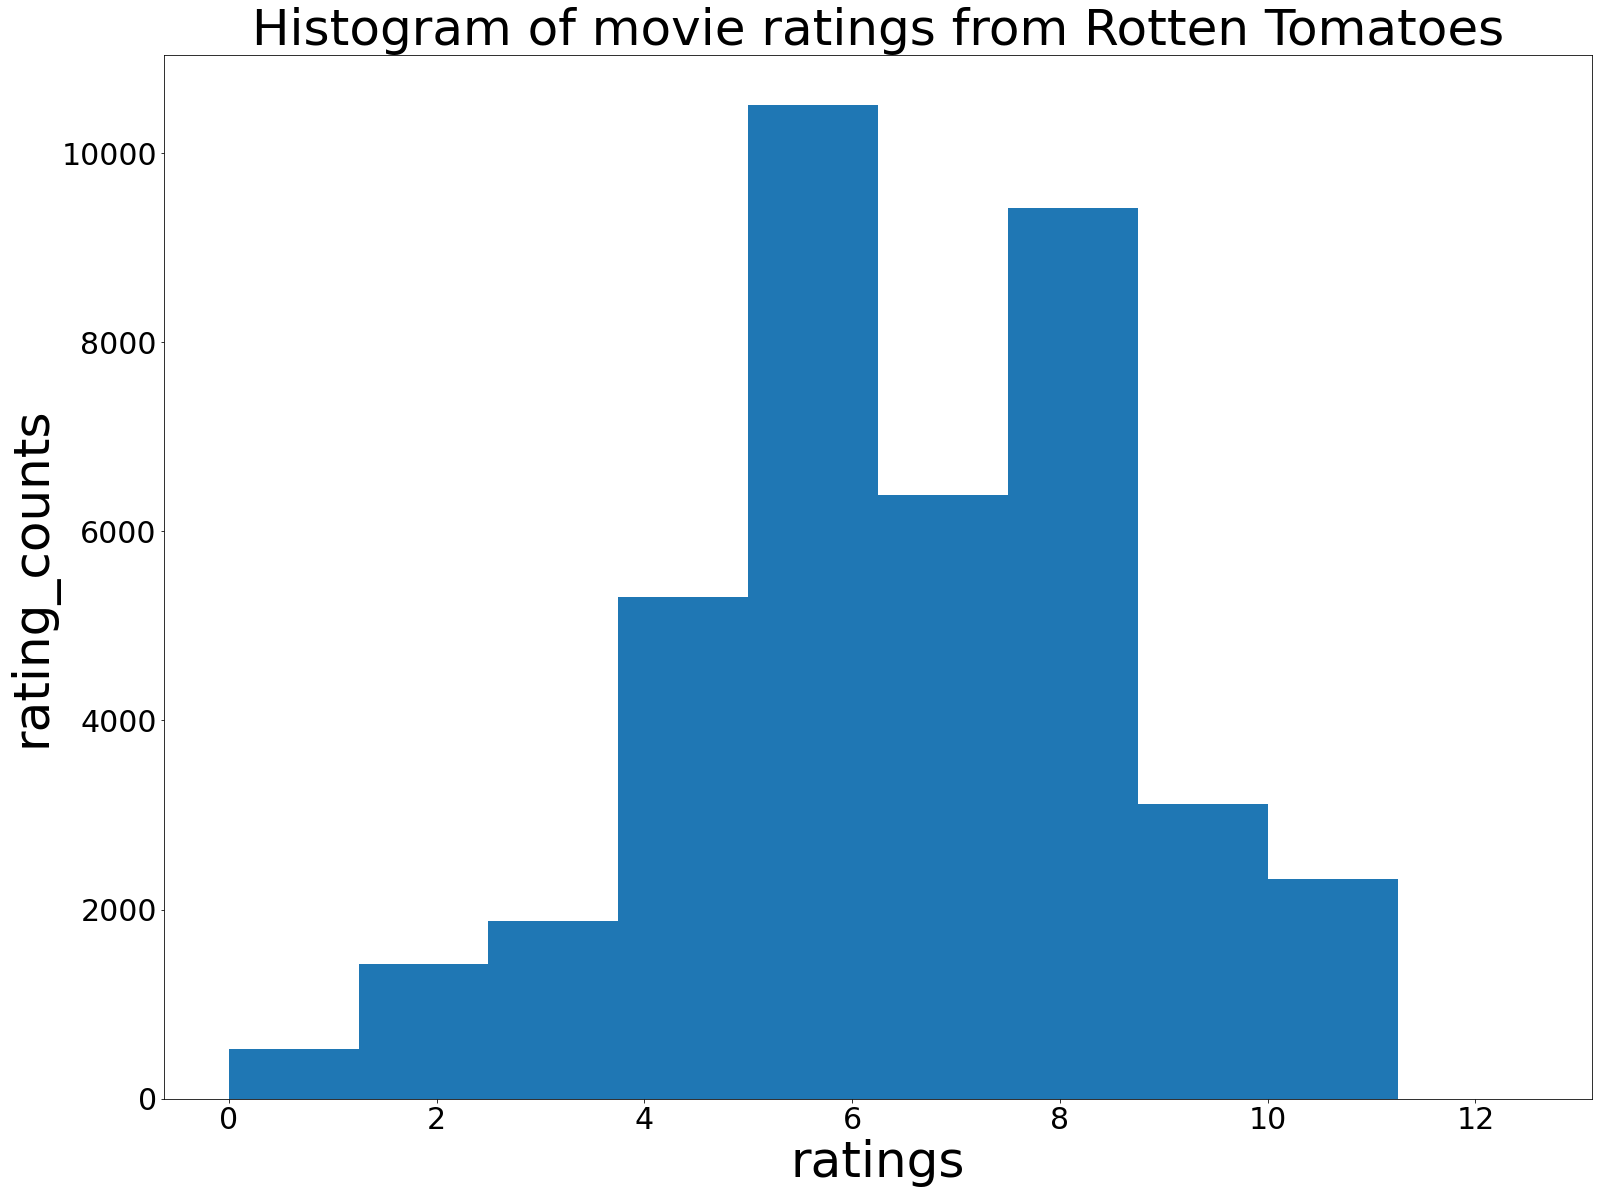

In [320]:
fig, ax= plt.subplots(figsize= (25.6,19.2))
ax.hist(joined_data['rating']);
ax.set_xlabel('ratings', fontsize= 50)
ax.set_ylabel('rating_counts', fontsize= 50)
plt.xticks(fontsize= 30)
plt.yticks(fontsize= 30)
ax.set_title('Histogram of movie ratings from Rotten Tomatoes', fontsize= 50);

In [292]:
stats.skew(joined_data['rating'].dropna())

-0.37999884935315575

Skewness is close to 0, therefore, the distribution of ratings is fairly normal. So, i will use the mean aggregate function in the following cell

In [17]:
# get the ratings, genres and synopsis of the movies sorted by rating decreasingly
movie_ratings_sorted= joined_data.sort_values('rating', ascending= False).loc[:,['rating', 'synopsis', 'genre']]

# because some movies have very few reviews, i decide to only observe movies with more than 50 reviews
query= """SELECT * FROM movie_ratings_sorted
            WHERE synopsis IN
                (SELECT synopsis
                FROM movie_ratings_sorted GROUP BY synopsis HAVING COUNT(rating) > 50)"""
more_than_50_ratings= sqldf(query)

# getting rid of duplicate data
no_duplicates= more_than_50_ratings.loc[:,['synopsis', 'genre']].drop_duplicates()

# getting the means of all the reviews of each movie
mean_ratings= more_than_50_ratings.groupby('synopsis').mean().reset_index()
mean_ratings_with_genres= mean_ratings.join(no_duplicates.set_index('synopsis'), how= 'left', on= 'synopsis')

# getting the top 10 movies by mean of ratings
top_movies= mean_ratings_with_genres.sort_values('rating', ascending= False).drop('id', axis= 1)
top_10_movies= top_movies.head(10)

In [18]:
top_10_movies

,synopsis,rating,genre
274,When a Vietnam veteran discovers two million d...,8.941933,Action and Adventure|Drama|Mystery and Suspense
163,Indiana Jones (Harrison Ford) is no ordinary a...,8.893791,Action and Adventure
117,For this film adaptation of Peter Shaffer's Br...,8.839394,Drama|Musical and Performing Arts
72,"Based on a true story, Steven Spielberg's Schi...",8.647989,Drama
132,Hollywood 1927. George Valentin (Jean Dujardin...,8.626930,Comedy|Drama|Romance
185,Moving from one parish to another in Northern ...,8.555556,Documentary
57,After making a striking directorial debut with...,8.555490,Comedy|Drama|Romance
76,"CALL ME BY YOUR NAME, the new film by Luca Gua...",8.504624,Drama|Romance
180,"Mark Renton (Ewan McGregor), a young man with ...",8.489943,Comedy|Drama
156,"In this adaptation of the novel ""The Price of ...",8.482036,Drama|Romance


In [19]:
# observing the synopsis to look for the movie names
top_10_movies['synopsis'][72]

"Based on a true story, Steven Spielberg's Schindler's List stars Liam Neeson as Oskar Schindler, a German businessman in Poland who sees an opportunity to make money from the Nazis' rise to power. He starts a company to make cookware and utensils, using flattery and bribes to win military contracts, and brings in accountant and financier Itzhak Stern (Ben Kingsley) to help run the factory. By staffing his plant with Jews who've been herded into Krakow's ghetto by Nazi troops, Schindler has a dependable unpaid labor force. For Stern, a job in a war-related plant could mean survival for himself and the other Jews working for Schindler. However, in 1942, all of Krakow's Jews are assigned to the Plaszow Forced Labor Camp, overseen by Commandant Amon Goeth (Ralph Fiennes), an embittered alcoholic who occasionally shoots prisoners from his balcony. Schindler arranges to continue using Polish Jews in his plant, but, as he sees what is happening to his employees, he begins to develop a consci

In [402]:
# for movies without the title in the synopsis, i google the title using the cast

In [21]:
movie_1= 'No country for old men'
movie_2= 'Indiana Jones: Raiders of the lost ark'
movie_3= 'Amadeus'
movie_4= 'Schindlers List'
movie_5= 'The Artist'
movie_6= 'Deliver Us from Evil'
movie_7= 'Lost in Translation'
movie_8= 'Call me by your name'
movie_9= 'Trainspotting'
movie_10= 'The price of salt'

# adding the movie names to the top_10 dataframe
top_10_movies['movie_names']= [movie_1, movie_2, movie_3, movie_4, movie_5, movie_6, movie_7, movie_8, movie_9, movie_10]

In [22]:
top_10_movies

,synopsis,rating,genre,movie_names
274,When a Vietnam veteran discovers two million d...,8.941933,Action and Adventure|Drama|Mystery and Suspense,No country for old men
163,Indiana Jones (Harrison Ford) is no ordinary a...,8.893791,Action and Adventure,Indiana Jones: Raiders of the lost ark
117,For this film adaptation of Peter Shaffer's Br...,8.839394,Drama|Musical and Performing Arts,Amadeus
72,"Based on a true story, Steven Spielberg's Schi...",8.647989,Drama,Schindlers List
132,Hollywood 1927. George Valentin (Jean Dujardin...,8.626930,Comedy|Drama|Romance,The Artist
185,Moving from one parish to another in Northern ...,8.555556,Documentary,Deliver Us from Evil
57,After making a striking directorial debut with...,8.555490,Comedy|Drama|Romance,Lost in Translation
76,"CALL ME BY YOUR NAME, the new film by Luca Gua...",8.504624,Drama|Romance,Call me by your name
180,"Mark Renton (Ewan McGregor), a young man with ...",8.489943,Comedy|Drama,Trainspotting
156,"In this adaptation of the novel ""The Price of ...",8.482036,Drama|Romance,The price of salt


### The top 5 movies are:
- No country for old men : Action/Adventure/Mystery
- Raiders of the lost ark : Action/Adventure
- Amadeus : Musical/Drama
- Schlinders List : Drama
- The Artist : Romcom/Drama

## What are the top 5 movie genres by popularity?

To answer this question, we will look at the top movies with with high ratings, and observe the most frequently occuring movie genres.

In [28]:
# I shall consider the 'superior movies' in this case to be the top 40% of the top movies
top_movies.shape

(287, 3)

In [29]:
# get the number of records to include in the superior
287 *0.4

114.80000000000001

In [31]:
superior_movies= top_movies.iloc[:115]

(115, 3)

In [33]:
# this library helps us split a string using multiple seperators
import re

In [57]:
# now we split the the genre values for each record
genre_split= superior_movies['genre'].map(lambda x: re.split("\\||and", x))

In [72]:
# we get a list of all the genres in the superior dataframe
superior_genres= []
for i in genre_split:
    superior_genres.extend([genre.strip() for genre in i ])
len(superior_genres)

331

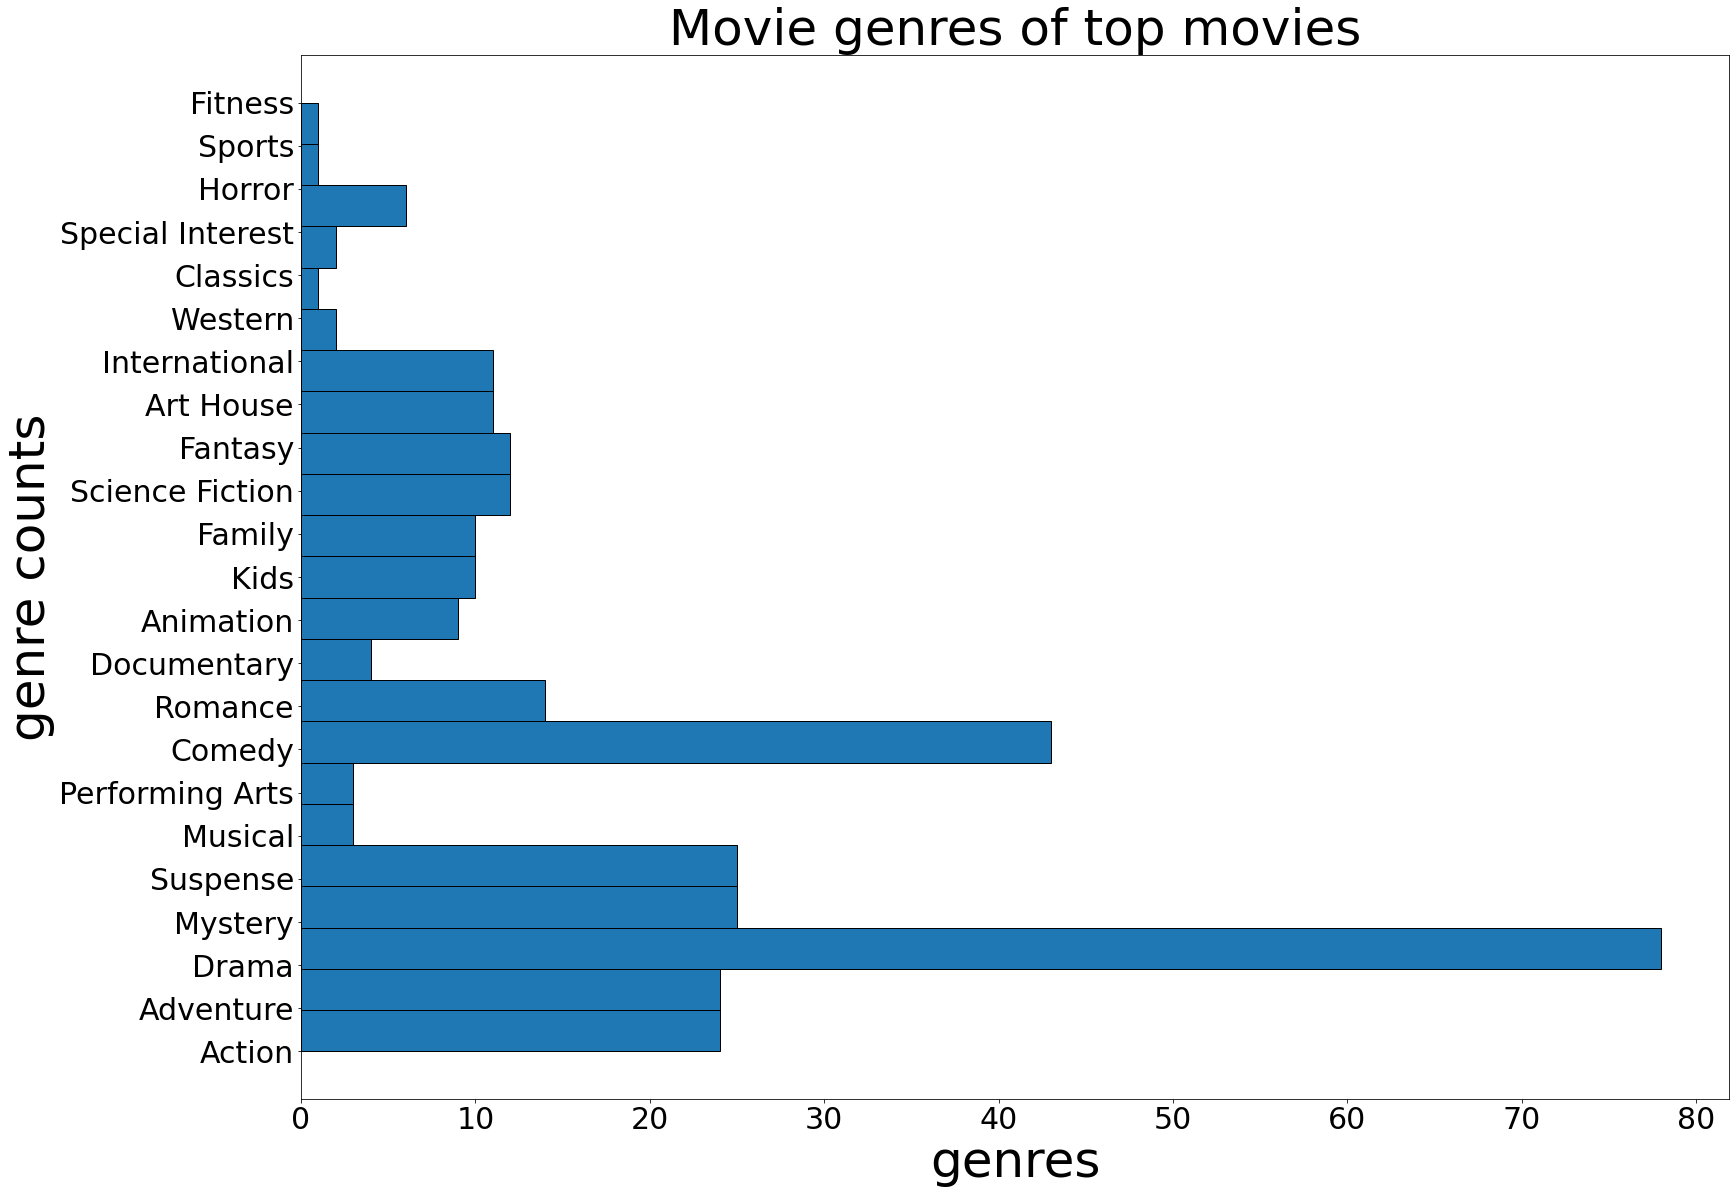

In [86]:
fig, ax= plt.subplots(figsize= (25.6,19.2))
ax.hist(superior_genres, orientation= 'horizontal', bins= len(set(superior_genres)), edgecolor= 'black');
ax.set_xlabel('genres', fontsize= 50)
ax.set_ylabel('genre counts', fontsize= 50)
plt.xticks(fontsize= 30)
plt.yticks(fontsize= 30)
ax.set_title('Movie genres of top movies', fontsize= 50);

### The top 5 movie genres are:
- Drama
- Comedy
- Mystery
- Suspense
- Adventure
### Honorable mention
- Action

## What are the movies with the most money made and what are their genres

In [3]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [16]:
# function that converts the monetary columns to integers
def numerize(col):
    no_comma= movie_budgets[col].map(lambda x: x.replace(',', ''))
    no_dollar= no_comma.map(lambda x: x.replace('$', ''))
    numerized_col= pd.to_numeric(no_dollar)
    return numerized_col

In [17]:
movie_budgets['production_budget']= numerize('production_budget')
movie_budgets['domestic_gross']= numerize('domestic_gross')
movie_budgets['worldwide_gross']= numerize('worldwide_gross')

In [24]:
# getting the profit/loss the movies made
movie_budgets['profit_loss']= movie_budgets['production_budget']- movie_budgets['domestic_gross']+ movie_budgets['worldwide_gross']

In [34]:
# we will only look at the top 10 movies
movie_budgets.sort_values('profit_loss', ascending= False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_loss
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2440837654
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,1748844451
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1669318718
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1422648995
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1355715774
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1274608095
22,23,"Apr 14, 2017",The Fate of the Furious,250000000,225764765,1234846267,1259081502
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,1215200000
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1211584239
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1119656350


From pre-acquired knowledge, i am aware of the genres in the movies displayed above.

### The top profitable movies and their genres are:
- Avatar: Action/Scifi/Drama
- Titanic: Drama/romance/true-story
- Avengers: Infinity War Action/Scifi/
- Star Wars Ep. VII: The Force Awakens: Action/Scifi
- Furious 7: Action/Drama/Comedy
- Avengers: Age of Ultron: Action/Scifi
- The Fate of the Furious: Action/Comedy
- Pirates of the Caribbean: On Stranger Tides: Adventure/Comedy
- Jurassic World: Adventure/Action
- The Avengers: Action/Scifi/Comedy/Drama

## Conclusions

The most popular movies amongst the general audience seems to be science fiction and action. While the most popular movies among movie critics seem to be Drama and Comedy. So i recommend Microsoft studios to:
- Create a movie that has all 4 of the above mentioned genres: action, scifi, drama, comedy (the movie deadpool comes to mind)
- Stay away from Sports and Fitness genres.<br>
I have also concluded that the top movies have multiple sequels. So i suggest Microsoft studios to:
- to put  some of their resources aside for a future sequel.
